In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
!pip install yfinance
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 아후 파이낸스에서 데이터 가져오기

In [50]:
df=yf.download("AAPL",start="2022-07-11",end="2022-07-25")
print(df)

[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Date                                                                        
2022-07-11 00:00:00-04:00  145.669998  146.639999  143.779999  144.869995   
2022-07-12 00:00:00-04:00  145.759995  148.449997  145.050003  145.860001   
2022-07-13 00:00:00-04:00  142.990005  146.449997  142.119995  145.490005   
2022-07-14 00:00:00-04:00  144.080002  148.949997  143.250000  148.470001   
2022-07-15 00:00:00-04:00  149.779999  150.860001  148.199997  150.169998   
2022-07-18 00:00:00-04:00  150.740005  151.570007  146.699997  147.070007   
2022-07-19 00:00:00-04:00  147.919998  151.229996  146.910004  151.000000   
2022-07-20 00:00:00-04:00  151.119995  153.720001  150.369995  153.039993   
2022-07-21 00:00:00-04:00  154.500000  155.570007  151.940002  155.350006   
2022-07-22 00:00:00-04:00  155.389999  156.279999  153.410004  154.089996   

      

## 데이터 변환

In [51]:
# convert dataframe to numpy
numpyData =df.values
numpyData

array([[1.45669998e+02, 1.46639999e+02, 1.43779999e+02, 1.44869995e+02,
        1.44669037e+02, 6.31416000e+07],
       [1.45759995e+02, 1.48449997e+02, 1.45050003e+02, 1.45860001e+02,
        1.45657669e+02, 7.75888000e+07],
       [1.42990005e+02, 1.46449997e+02, 1.42119995e+02, 1.45490005e+02,
        1.45288193e+02, 7.11856000e+07],
       [1.44080002e+02, 1.48949997e+02, 1.43250000e+02, 1.48470001e+02,
        1.48264053e+02, 7.81407000e+07],
       [1.49779999e+02, 1.50860001e+02, 1.48199997e+02, 1.50169998e+02,
        1.49961700e+02, 7.62599000e+07],
       [1.50740005e+02, 1.51570007e+02, 1.46699997e+02, 1.47070007e+02,
        1.46865997e+02, 8.14209000e+07],
       [1.47919998e+02, 1.51229996e+02, 1.46910004e+02, 1.51000000e+02,
        1.50790543e+02, 8.29824000e+07],
       [1.51119995e+02, 1.53720001e+02, 1.50369995e+02, 1.53039993e+02,
        1.52827713e+02, 6.48234000e+07],
       [1.54500000e+02, 1.55570007e+02, 1.51940002e+02, 1.55350006e+02,
        1.55134521e+02, 

In [52]:
numpyDataShape = np.shape(numpyData)
numpyDataShape

(10, 6)

In [53]:
numpyDataShape = numpyData.shape
numpyDataShape

(10, 6)

In [66]:
# only close value
closeValue = numpyData[:,3:4]
print(closeValue)

[[144.86999512]
 [145.86000061]
 [145.49000549]
 [148.47000122]
 [150.16999817]
 [147.07000732]
 [151.        ]
 [153.03999329]
 [155.3500061 ]
 [154.08999634]]


## 그래프 그리기

[0 1 2 3 4 5 6 7 8 9]


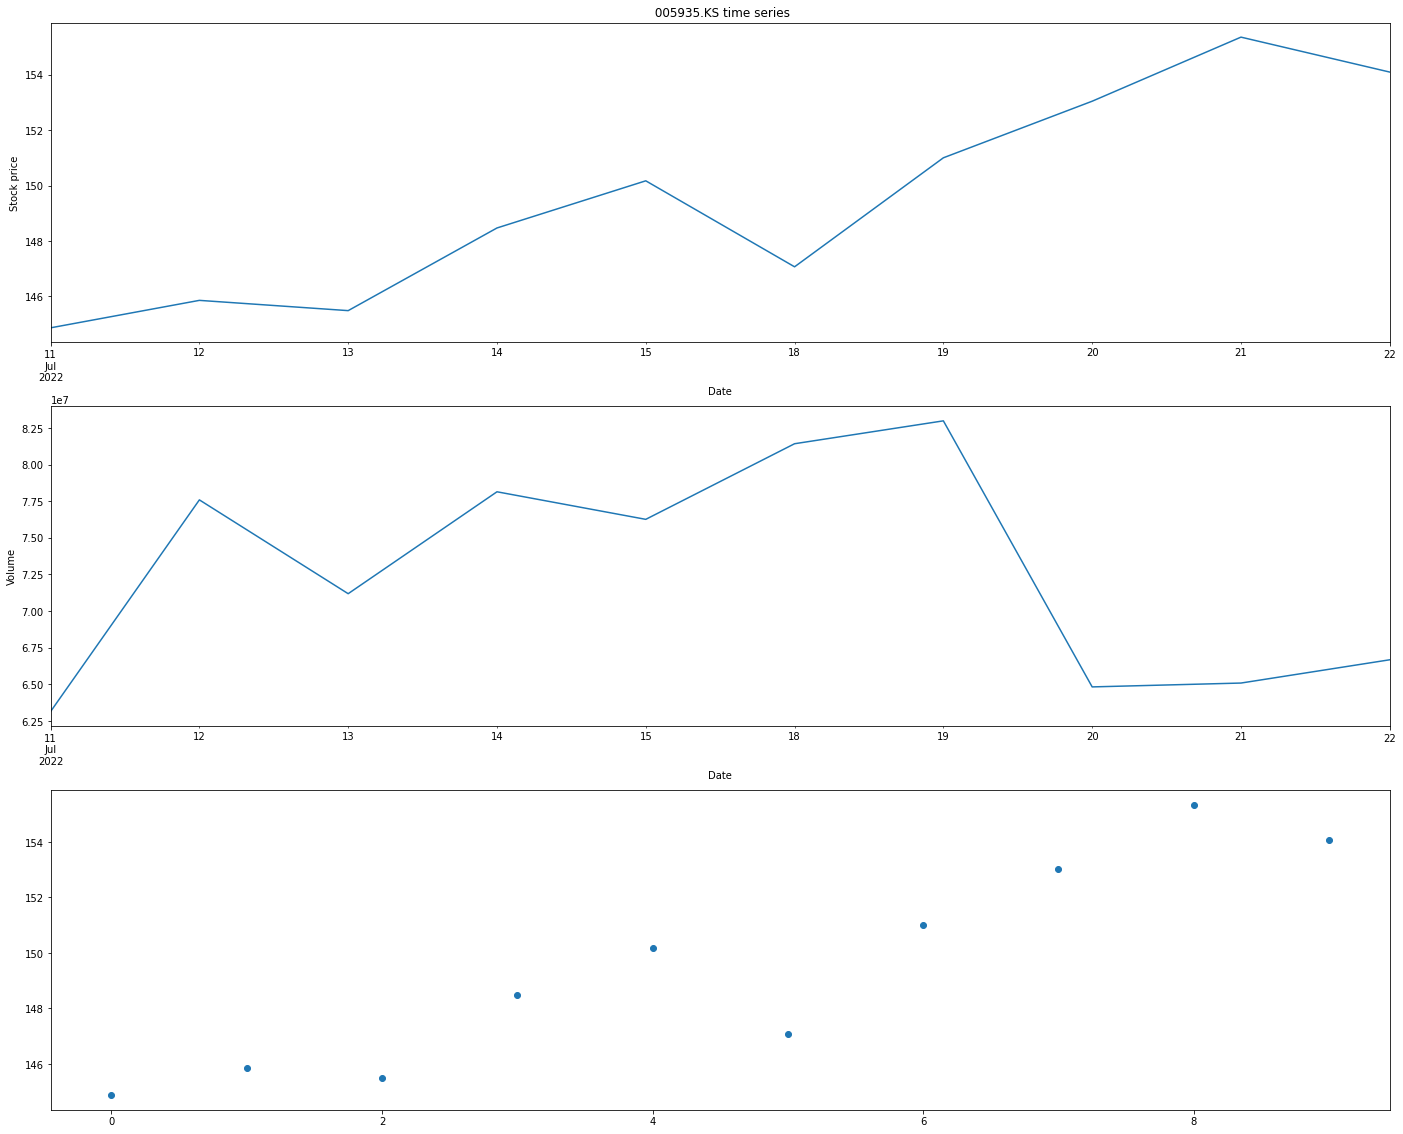

In [55]:
fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(24,20))
df.Close.plot(ax=ax1)
ax1.set(title = ' 005935.KS time series',
          ylabel = 'Stock price')

df.Volume.plot(ax=ax2)
ax2.set(ylabel = 'Volume')

xval=np.arange(10)
print(xval)
ax3.scatter(xval, closeValue)

In [56]:
x_data = np.arange(10)
y_data = closeValue
print("x_data = ", x_data)
print("y_data = ", y_data)

x_data =  [0 1 2 3 4 5 6 7 8 9]
y_data =  [[144.86999512]
 [145.86000061]
 [145.49000549]
 [148.47000122]
 [150.16999817]
 [147.07000732]
 [151.        ]
 [153.03999329]
 [155.3500061 ]
 [154.08999634]]


In [57]:
x_data = np.arange(10)
x_data = (x_data+1).tolist()
y_data = closeValue.ravel()
y_data = (y_data/50.).tolist()
print("x_data = ", x_data)
print("y_data = ", y_data)

x_data =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_data =  [2.89739990234375, 2.917200012207031, 2.9098001098632813, 2.9694000244140626, 3.0033999633789064, 2.941400146484375, 3.02, 3.060799865722656, 3.1070001220703123, 3.0817999267578124]


## Regression 실행

In [76]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt  # 그래프 그리기


print(tf.__version__)

x_data = [1, 2, 3, 4, 5, 6, 7, 8]  # 8개 데이터만 사용
y_data = [2.89739990234375, 2.917200012207031, 2.9098001098632813, 2.9694000244140626, 3.0033999633789064, 2.941400146484375, 3.02, 3.060799865722656]


learning_rate = 0.001 # 학습률

W = tf.Variable(2.9)
b = tf.Variable(0.5)

x_axis_loop = []
y_axis_cost = []


for i in range(20000):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)  # 다음 W = 현재 W - learning_rate*W_grad
    b.assign_sub(learning_rate * b_grad)
    
    if ( i > 500):
      x_axis_loop.append(i)
      y_axis_cost.append(cost)

    if i % 1000 == 0:
      print("{:5}|{:10.4f}|{:10.4f}| cost = {:10.6f}".format(i, W.numpy(), b.numpy(), cost))



2.9.2
    0|    2.7745|    0.4788| cost = 155.551697
 1000|    0.3543|    0.9966| cost =   0.723396
 2000|    0.2447|    1.6131| cost =   0.325844
 3000|    0.1711|    2.0266| cost =   0.146967
 4000|    0.1218|    2.3040| cost =   0.066482
 5000|    0.0887|    2.4901| cost =   0.030268
 6000|    0.0665|    2.6149| cost =   0.013973
 7000|    0.0516|    2.6986| cost =   0.006642
 8000|    0.0416|    2.7548| cost =   0.003343
 9000|    0.0349|    2.7925| cost =   0.001859
10000|    0.0304|    2.8177| cost =   0.001191
11000|    0.0274|    2.8347| cost =   0.000890
12000|    0.0254|    2.8460| cost =   0.000755
13000|    0.0240|    2.8537| cost =   0.000694
14000|    0.0231|    2.8588| cost =   0.000667
15000|    0.0225|    2.8622| cost =   0.000655
16000|    0.0221|    2.8645| cost =   0.000649
17000|    0.0218|    2.8661| cost =   0.000646
18000|    0.0216|    2.8671| cost =   0.000645
19000|    0.0215|    2.8678| cost =   0.000645


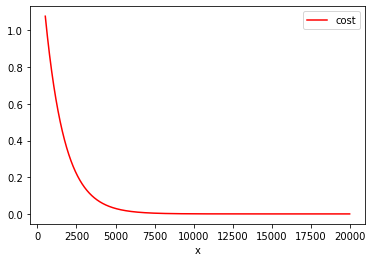

(2.5, 3.5)

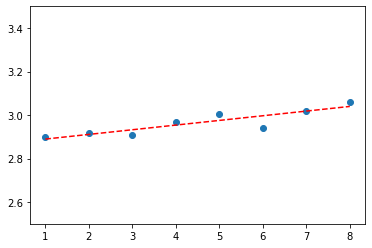

In [79]:
# cost 함수 그래프 그리기

plt.plot(x_axis_loop, y_axis_cost, 'r-', label='cost')
plt.legend()
plt.xlabel('x')
plt.show()

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis, 'r--')
plt.ylim(2.5, 3.5)


## 다음날 주가 **예측**

In [80]:
x_pred = [9]  #  
# hypothesis = W * x_data + b
hypothesis = W * x_pred + b

print(" 예측 주가 = ", hypothesis)
print(" 예측 주가= ", hypothesis.numpy()[0])
price1004 = hypothesis.numpy()[0]*50
print(" 예측 주가 = ", price1004)

 예측 주가 =  tf.Tensor([3.0612102], shape=(1,), dtype=float32)
 예측 주가=  3.0612102
 예측 주가 =  153.06050777435303


## Tensorflow !.XX 버전

In [ ]:
# Linear Regression for stock forecasting

# 5 개 이상  선택
x_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y_data = [1.468, 1.462, 1.472, 1.478, 1.472, 1.454, 1.444, 1.446, 1.45, 1.456, ]


# Try to find values for W and b to compute Y = W * X + b
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# placeholders for a tensor that will be always fed using feed_dict

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis is X * W + b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    # Fit the line
    for step in range(2001):
        _, cost_val, W_val, b_val = sess.run(
            [train, cost, W, b], feed_dict={X:x_data , Y:y_data}
        )
        if step % 100 == 0:
            print(step, cost_val, W_val, b_val)

    # Testing our model
    print(" prediction value : " ,sess.run(hypothesis, feed_dict={X: [10.]}))
   